# A1.2 Regresión lineal simple

1. Se importan los datos del csv y se obtienen los 10 países con mayor indice de felicidad, para esto se hace uso de la función **sort_values** con el campo de Felicidad y una bandera adicional para indicar que se quiere ordenar de forma descendente. Posterior a eso, se imprime una cabeza del DataFrame con los primeros 10 registros.  

In [12]:
import pandas as pd

df = pd.read_csv('A1.2 Felicidad y GDP.csv')
ordered = df.sort_values(by='Felicidad', ascending=False)
print(ordered.head(10))

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11


Después se obtienen los 10 países con mayor Producto Interno Bruto, para esto se hace uso de la misma función **sort_values** (con la misma bandera) pero con el campo de GDP. Al final se imprime la cabeza del DataFrame de 10 registros que muestran los países con mayor PIB. 

In [14]:
ordered = df.sort_values(by='GDP', ascending=False)
print(ordered.head(10))

               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


2. Se grafican las observaciones definiendo el valor de **y** como el nivel de felicidad y el valor de **x** como el logaritmo base 10 del GDP. Se utiliza la función **log10** de la librería numpy para transformar los valores de GDP.  

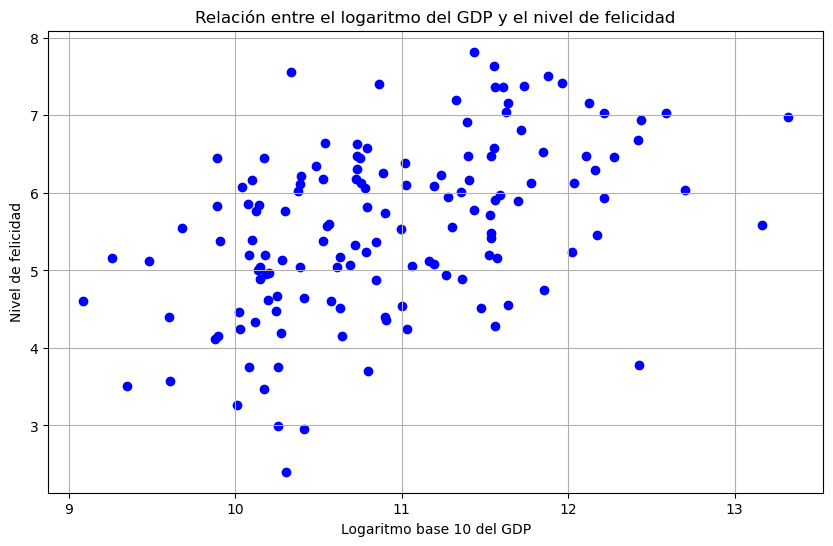

In [83]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Transformar los valores de GDP usando la función log10
gdp_log = np.log10(df['GDP'])

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(gdp_log, df['Felicidad'], color='blue', marker='o')
plt.title('Relación entre el logaritmo del GDP y el nivel de felicidad')
plt.xlabel('Logaritmo base 10 del GDP')
plt.ylabel('Nivel de felicidad')
plt.grid(True)
plt.show()


3. Se calculan los coeficientes **B0** y **B1** del **modelo de regresión lineal simple** a través de un programa en Python. 

In [24]:
import numpy as np

# Se calculan las medias de X (logaritmo base 10 de GDP) y Y (nivel de felicidad)
meanY = np.mean(df['Felicidad'])
meanX = np.mean(gdp_log)

# Se calcula el coeficiente B1 en base a la fórmula correspondiente
num = ((gdp_log - meanX) * (df['Felicidad'] - meanY)).sum()
den = ((gdp_log - meanX) ** 2).sum()
B1 = num / den

# Se calcula el coeficiente B0 en base a la fórmula correspondiente
B0 = meanY - B1 * meanX

# Se imprimen los coeficientes calculados
print(f"B0 = {B0}")
print(f"B1 = {B1}")


B0 = -1.3023500570747295
B1 = 0.628128465881041


4. Se grafica nuevamente las observaciones incluyendo la linea que representa el modelo de regresión lineal simple, usando un valor de transparencia de 0.75 tanto para las observaciones como para la línea.  

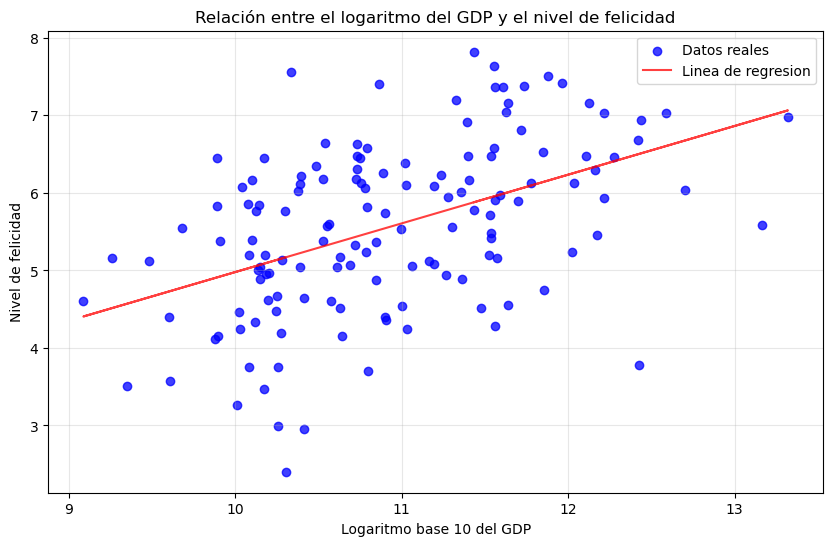

In [85]:
# Se calcula la linea de regresión
line = B0 + B1 * gdp_log

# Se crea la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(gdp_log, df['Felicidad'], color='blue', marker='o', alpha=0.75, label='Datos reales')
plt.plot(gdp_log, line, color='red', alpha=0.75, label='Linea de regresion')

# Se personalizar la gráfica
plt.title('Relación entre el logaritmo del GDP y el nivel de felicidad')
plt.xlabel('Logaritmo base 10 del GDP')
plt.ylabel('Nivel de felicidad')
plt.grid(True, alpha=0.3)  
plt.legend()  
plt.show()

5. Se calcula el **Residual Sum of Squares** (RSS) del modelo

In [34]:
res = df['Felicidad'] - line
rss = np.sum(res ** 2)

print(f"RSS del modelo: {rss}")

RSS del modelo: 131.3738317732635


6. Se calcula el **error estándar** e **intervalo de confianza** de 𝛽̂1

In [42]:
from scipy.stats import t

# Calculo del error estandar
sigma_sq = rss / (len(gdp_log) - 2)
sxx = np.sum((gdp_log - meanX) ** 2)
SEB1 = np.sqrt(sigma_sq / sxx)

# Calculo del intervalo de confianza para B1
alpha = 0.05 # 95% de confianza (nivel de significancia)
t_crit = t.ppf(1 - alpha / 2, df=len(gdp_log) - 2) # Valor crítico de t
IC_lower = B1 - t_crit * SEB1 # Limite inferior
IC_upper = B1 + t_crit * SEB1 # Limite superior

# Impresion de resultados
print(f"Error estandar de B1 (SEB1): {SEB1}")
print(f"Intervalo de confianza de B1 (95% confianza): ({IC_lower}, {IC_upper})")

Error estandar de B1 (SEB1): 0.09983378435340727
Intervalo de confianza de B1 (95% confianza): (0.43073933130733133, 0.8255176004547506)


Se determina si la asociación entre la felicidad y el GDP es significativa en esta población, para esto se plantean las hipotesis (nula y alternativa) y se calcula el valor estadístico t y el valor de p. Posteriormente se comparan estos valores estadísticos con otros calculados, para poder rechazar la hipotesis nula y afirmar que hay una relación entre las dos variables, se hacen las siguientes comparaciones: 
- El valor absoluto del valor estadistico t debe ser mayor al valor critico t.
- El valor de p debe ser inferior al nivel de significancia. 

In [51]:
# Calculo del valor de p
t_stat = B1 / SEB1
p_value = 2 * (1 - t.cdf(abs(t_stat), df=len(gdp_log) - 2))

# Impresion de resultados
print(f"Estadistico t: {t_stat}")
print(f"Valor p: {p_value}")
print(f"Valor critico de t: ±{t_crit}")

# Determinar si hay relacion significativa entre las variables
if abs(t_stat) > t_crit and p_value < alpha:
    print("La asociacion es estadisticamente significativa debido a que el valor absoluto del valor estadistico de t es superior al valor critico t y el valor p es inferior al nivel de significancia")
elif abs(t_stat) > t_crit:
    print("La asociacion es estadisticamente significativa debido a que el valor absoluto del valor estadistico de t es superior al valor critico t")
elif p_value < alpha:
    print("La asociacion es estadisticamente significativa debido a que el valor p es inferior al nivel de significancia")
else:
    print("No hay evidencia suficiente que demuestre que hay una asociacion estadisticamente significativa")

Estadistico t: 6.291742519320849
Valor p: 3.825717964645037e-09
Valor critico de t: ±1.977177724476122
La asociacion es estadisticamente significativa debido a que el valor absoluto del valor estadistico de t es superior al valor critico t y el valor p es inferior al nivel de significancia


7. Se calcula el **residual standard error** y la R<sup>2</sup> del modelo a través del **total sum of squares** o TSS. Dependiendo del valor obtenido de R<sup>2</sup>, se pueden obtener diferentes conclusiones que indican que entre mas alto sea el valor, mejor ajuste tendrá el modelo.

In [66]:
# Cálculo del residual standard error
rse = np.sqrt(rss / (len(gdp_log) - 2))

# Calculo de R^2
tss = np.sum((df['Felicidad'] - meanY) ** 2)  # Total Sum of Squares
r2 = 1 - (rss / tss)

# Impresion de resultados
print(f"RSE: {rse}")
print(f"R2: {r2}")
if r2 > 0.8:
    print("El modelo tiene un ajuste excelente, ya que la relación entre ambas variables (nivel de felicidad y PIB) es alta así como la proporcion entre ellas")
elif r2 > 0.5:
    print("El modelo tiene un ajuste moderado, ya que el modelo explica parte de la relación entre ambas variables pero no toda")
elif r2 > 0.2:
    print("El modelo tiene un ajuste bajo, ya que indica poca variabiliad en Y (nivel de felicidad), se recomienda probar otro modelo")
else:
    print("El modelo no tiene buen ajuste, probablemente no haya una relación significativa entre ambas variables (nivel de felicidad y PIB)")

RSE: 0.9721807858537376
R2: 0.22166361654970657
El modelo tiene un ajuste bajo, ya que indica poca variabiliad en Y (nivel de felicidad), se recomienda probar otro modelo


8. Se verifican que todos los resultados de todos los puntos anteriores son los esperados a través de la función **OLS()** de la librería **statsmodels.api** 

In [78]:
import statsmodels.api as sm

# Se ajusta el modelo
X = sm.add_constant(gdp_log)
model = sm.OLS(df['Felicidad'], gdp_log)
res = model.fit()
rss = np.sum(res.resid ** 2)

# Imprimir el resumen del modelo, p-values y coeficientes
print(res.summary())
print("P-Values:")
print(res.pvalues)
print("Coeficientes:")
print(res.params)
print(f"RSS: {rss}")
print(f"RSE: {res.scale**.5}")

                                 OLS Regression Results                                
Dep. Variable:              Felicidad   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              4636.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):                   3.37e-109
Time:                        03:12:13   Log-Likelihood:                         -195.80
No. Observations:                 141   AIC:                                      393.6
Df Residuals:                     140   BIC:                                      396.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Tabla de comparaciones

<table>
    <thead>
        <tr>
            <td><strong>Estadistico</strong></td>
            <td><strong>Calculado</strong></td>
            <td><strong>OSL</strong></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>B0 y B1</td>
            <td>-1.3023500570747295 0.628128465881041</td>
            <td>ND 0.5096</td>
        </tr>
        <tr>
            <td>RSS</td>
            <td>131.3738317732635</td>
            <td>132.71383206618617</td>
        </tr>
        <tr>
            <td>RSE</td>
            <td>0.9721807858537376</td>
            <td>0.9736302908855605</td>
        </tr>
        <tr>
            <td>SEB1</td>
            <td>0.09983378435340727</td>
            <td>0.007</td>
        </tr>
        <tr>
            <td>Estadistico t</td>
            <td>6.291742519320849</td>
            <td>68.090</td>
        </tr>
        <tr>
            <td>Valor p</td>
            <td>3.825717964645037e-09</td>
            <td>3.370977e-109</td>
        </tr>
        <tr>
            <td>R2</td>
            <td>0.22166361654970657</td>
            <td>0.971</td>
        </tr>
    </tbody>
</table>

En general, muchos de los valores estadísticos del modelo calculados a mano y obtenidos a través de la función OSL son similares (B1, RSS, RSE y SEB1), sin embargo, otros si tienen mucha diferencia (como la R2, valor p y el estadístico t). Esto puede deberse a varias razones, entre ellas puede ser el hecho de que el OSL haya hecho sus calculos sin un intercepto en el eje Y (el coeficiente B0), pero en general el modelo debe ser el mismo.

**Firma de honor:** Doy mi palabra de que he realizado esta actividad con integridad academica.